In [2]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
np.random.seed(42)

In [4]:
df = pd.read_csv(r'C:\Users\Lu\OneDrive - North Carolina State University\MSA studies\AA503\risk\Analysis_Data.csv')

In [4]:
df.head()

,Date,Cost_per_Crude_Well_Drilled,Cost_per_Natural_Gass_Well_Drilled,Cost_pe_ Dry_Well_Drilled,return_Crude_Oil,Return_Natural_Gas,Return_Dry_Well
0,1960,52.2,102.7,44.0,.,.,.
1,1961,51.3,94.7,45.2,-1.72%,-7.79%,2.73%
2,1962,54.2,97.1,50.8,5.65%,2.53%,12.39%
3,1963,51.8,92.4,48.2,-4.43%,-4.84%,-5.12%
4,1964,50.6,104.8,48.5,-2.32%,13.42%,0.62%


In [5]:
df = df[(df['Date'] > 1990) & (df['Date'] < 2007)]

In [5]:
#df.to_csv(r'C:\Users\Lu\OneDrive - North Carolina State University\MSA studies\AA503\risk\pivot.csv')

In [14]:
#reread
df=pd.read_csv(r'C:\Users\Lu\OneDrive - North Carolina State University\MSA studies\AA503\risk\pivot_2.csv')

In [15]:
df.head()

,Date,Type,Cost_per_Drilled,Return
0,1991,Oil,346.9,0.0780
1,1992,Oil,362.3,0.0444
2,1993,Oil,356.6,-0.0157
3,1994,Oil,409.5,0.1483
4,1995,Oil,415.8,0.0154


# Normal

## From 2006 to 2012 changes were relatively consistent in their distribution. This distribution is discussed as Normal

In [16]:
#get mean and sd of return rate
np.std(df['Return']), np.mean(df['Return'])

(0.1765663539402397, 0.1314875)

In [22]:
#cost mean
np.mean(df['Cost_per_Drilled'])

963.8020833333336

In [25]:
[i for i in range(2006,2012)]

[2006, 2007, 2008, 2009, 2010, 2011]

In [73]:
mu, sigma, cost_t0 = 0.1314875, 0.1765663539402397,963.8020833333336 # mean and standard deviation
# dx = np.random.normal(mu, sigma, 10000)
# cost_t = cost_t0*(1+dx)

#2006-2012
def normal_d(mu, sigma, cost_t0):
    for i in range(10001):
        dx = np.random.normal(mu, sigma, 10000)
        Pt = cost_t0*(1 + dx)

        for j in range(2006, 2012):
            dx = np.random.normal(mu, sigma, 10000)
            Pt = Pt*(1 + dx)
        return Pt
cost_2006_2012=normal_d(mu, sigma, cost_t0)



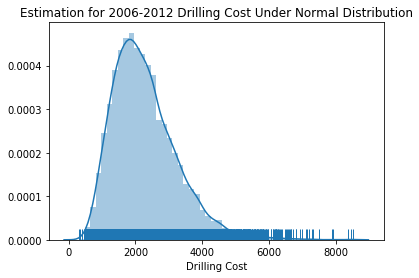

In [27]:
ax=sns.distplot(cost_2006_2012,  rug=True)

  
# giving labels to x-axis and y-axis 
ax.set(xlabel ='Drilling Cost') 
  
# giving title to the plot 
plt.title('Estimation for 2006-2012 Drilling Cost Under Normal Distribution'); 
  
# function to show plot 
plt.show() 

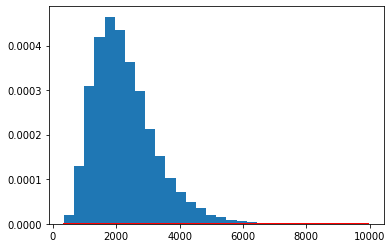

In [151]:
import matplotlib.pyplot as plt
count, bins, ignored = plt.hist(cost_2006_2012, 30, density=True)
plt.plot(bins, 1/(sigma * np.sqrt(2 * np.pi)) *
               np.exp( - (bins - mu)**2 / (2 * sigma**2) ),
         linewidth=2, color='r')
plt.show()

In [28]:
cost_2006_2012.mean()

2292.0514258773

In [146]:
## qq plot

In [29]:
cost_2006_2012


array([1529.24038838, 2319.72244417, 2077.46331875, ..., 2538.92675161,
       1845.00263798, 1817.49100456])

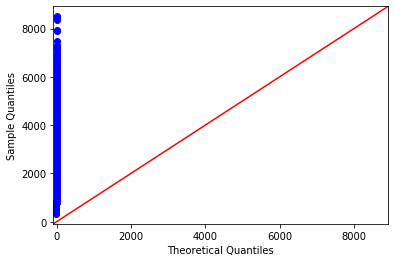

In [30]:
import statsmodels.api as sm 
import pylab as py 
  
# np.random generates different random numbers 
# whenever the code is executed 
# Note: When you execute the same code  
# the graph look different than shown below. 
 

sm.qqplot(cost_2006_2012, line ='45') 
py.show() 

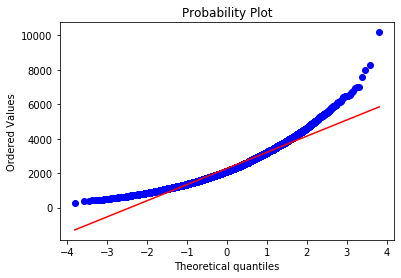

In [74]:
from scipy import stats
from scipy.stats import shapiro

# stat, p = shapiro(cost_2006_2012)
# print('Statistics=%.3f, p=%.3f' % (stat, p))
# # interpret
# alpha = 0.05
# if p > alpha:
# 	print('Sample looks Gaussian (fail to reject H0)')
# else:
# 	print('Sample does not look Gaussian (reject H0)')
    
ax1 = plt.subplot()
qqplot = stats.probplot(cost_2006_2012, plot = plt)

### triangular

In [31]:
#2012-2015 average by 9.17% per year with a maximum of 22% and minimum of 7%.¶
t_min1, t_mean1, t_max1=0.07, 0.0917, 0.22
cost_t1=cost_2006_2012.mean()
def triangular(t_min1, t_mean1, t_max1):
    for i in range(10001):
        dx = np.random.triangular(t_min1, t_mean1,t_max1, size=10000) 
        Pt = cost_t1*(1 + dx)
        for j in range(2012, 2015):
            dx = np.random.triangular(left = t_min1, mode = t_mean1, right = t_max1, size=10000) 
            Pt = Pt*(1 + dx)
        return Pt
cost_2012_2015=triangular(t_min1, t_mean1, t_max1)

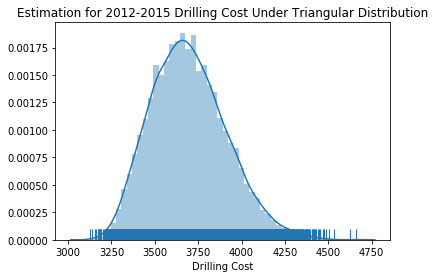

In [32]:
ax=sns.distplot(cost_2012_2015,  rug=True)

  
# giving labels to x-axis and y-axis 
ax.set(xlabel ='Drilling Cost') 
  
# giving title to the plot 
plt.title('Estimation for 2012-2015 Drilling Cost Under Triangular Distribution'); 
  
# function to show plot 
plt.show() 

In [33]:
#From 2015 to 2019 costs tended to increase on average by 5% per year with a maximum of 6% and minimum of 2%.
t_min2, t_mean2, t_max2=0.02, 0.05, 0.06
cost_t2=cost_2012_2015.mean()
def triangular(t_min2, t_mean2, t_max2):
    for i in range(10001):
        dx = np.random.triangular(t_min2, t_mean2, t_max2, size=10000) 
        Pt = cost_t2*(1 + dx)
        for j in range(2012, 2015):
            dx = np.random.triangular(t_min2, t_mean2, t_max2, size=10000) 
            Pt = Pt*(1 + dx)
        return Pt
cost_2015_2019=triangular(t_min2, t_mean2, t_max2)

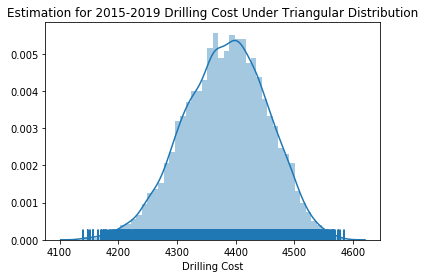

In [35]:
#2020 is forecasted to follow the same increase distribution as from 2015 to 2019.
t_min3, t_mean3, t_max3=0.02, 0.05, 0.06
cost_t3=cost_2015_2019.mean()
def triangular(t_min3, t_mean3, t_max3):
    for i in range(10001):
        dx = np.random.triangular(t_min3, t_mean3, t_max3, size=10000) 
        Pt = cost_t3*(1 + dx)
    return Pt
cost_2020=triangular(t_min3, t_mean3, t_max3)

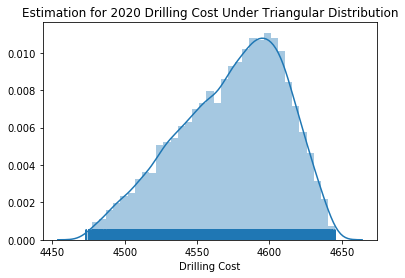

In [36]:
ax=sns.distplot(cost_2020,  rug=True)

  
# giving labels to x-axis and y-axis 
ax.set(xlabel ='Drilling Cost') 
  
# giving title to the plot 
plt.title('Estimation for 2020 Drilling Cost Under Triangular Distribution'); 
  
# function to show plot 
plt.show()

# Kernel

## The Price Analysis group would also like you to build a kernel density estimate of the distribution of arithmetic changes using the 48 observations described above (1990 – 2006). Use this kernel density to simulate the changes from 2006 to 2012 as well.

In [37]:
from sklearn.neighbors import KernelDensity
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import LeaveOneOut

In [67]:
df['Return'].mean()

0.1314875

In [38]:
#kernel for 1990-2006


#search for bandwidth

grid = GridSearchCV(KernelDensity(),
                    {'bandwidth': np.linspace(-.5, .5, 100)},
                    cv=20) # 20-fold cross-validation
grid.fit(df['Return'][:, None])
print (grid.best_params_)

{'bandwidth': 0.09595959595959602}


C:\Users\Lu\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


### simulate the changes from 2006 to 2012

In [53]:
def kde_sample(x, x_grid, n, bandwidth):
    """return random sample from KDE"""
    kde_skl = KernelDensity(bandwidth=bandwidth)
    kde_skl.fit(x[:, np.newaxis])
    sample = kde_skl.sample(n_samples = n, random_state = 42)
    return(sample)

In [117]:
df['Return'].describe()

count    48.000000
mean      0.131488
std       0.178435
min      -0.242100
25%       0.007625
50%       0.135250
75%       0.224575
max       0.551900
Name: Return, dtype: float64

In [49]:
x, x_grid,bandwidth =df['Return'], np.linspace(-.5, .5, 100),  0.09

kde_sample(x, x_grid, 1000, bandwidth)

array([[-1.42906910e-01],
       [-1.62680992e-01],
       [ 3.01917807e-01],
       [ 1.69952717e-01],
       [ 3.20581140e-01],
       [ 3.67470265e-01],
       [ 5.93529939e-02],
       [ 5.42620713e-03],
       [ 1.08685086e-01],
       [-3.38986484e-01],
       [ 1.16665640e-01],
       [ 2.28891892e-01],
       [ 5.08842095e-01],
       [ 1.13792628e-01],
       [ 2.86104911e-01],
       [ 4.78183757e-01],
       [ 3.28340036e-01],
       [ 9.33506276e-03],
       [ 1.79348654e-01],
       [ 3.92678053e-01],
       [ 6.36345543e-01],
       [ 2.60255974e-01],
       [ 3.40550870e-01],
       [-2.00504776e-01],
       [-6.09046605e-02],
       [ 9.64745089e-02],
       [-2.22107961e-01],
       [-6.41873759e-02],
       [ 2.28018051e-01],
       [-9.62146572e-02],
       [ 5.35081552e-01],
       [ 3.43824205e-01],
       [ 2.78528010e-01],
       [-2.48100701e-02],
       [ 3.03066009e-01],
       [ 7.80995664e-02],
       [ 3.55934524e-01],
       [ 9.54667716e-02],
       [ 2.0

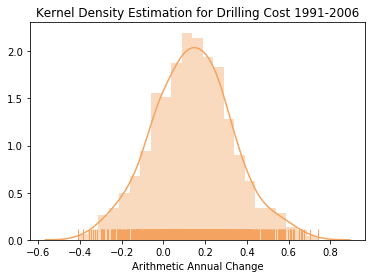

In [113]:
ax=sns.distplot(kde_sample(x, x_grid, 1000, bandwidth), color='sandybrown', rug=True)
  
# giving labels to x-axis and y-axis 
ax.set(xlabel ='Arithmetic Annual Change') 
  
# giving title to the plot 
plt.title('Kernel Density Estimation for Drilling Cost 1991-2006'); 
  
# function to show plot 
plt.show()

In [89]:
cost_t0=963.8020833333336 
x, x_grid,bandwidth =df['Return'], np.linspace(-.5, .5, 100),  0.09
for i in range(10000):
    dx = kde_sample(x, x_grid, n = 100, bandwidth=bandwidth)
    cost_t = cost_t0*(1+dx)
    
      # year == [2008, 2009, 2010, 2011, 2012]
    for j in range(5):
        dx = kde_sample(x, x_grid, n = 100, bandwidth=bandwidth)
        cost_t = cost_t*(1+dx)
   

In [90]:
 cost_t.mean()

1914.1312410671899

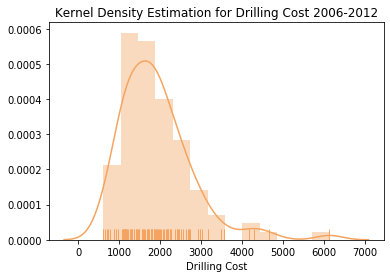

In [112]:
ax=sns.distplot(cost_t, color='sandybrown', rug=True)
  
# giving labels to x-axis and y-axis 
ax.set(xlabel ='Drilling Cost') 
  
# giving title to the plot 
plt.title('Kernel Density Estimation for Drilling Cost 2006-2012'); 
  
# function to show plot 
plt.show()



## keep going with the two triangular ones

In [93]:
kernel_2006_2012=cost_t

In [94]:
kernel_2006_2012.mean()

1914.1312410671899

In [95]:
#2012-2015 average by 9.17% per year with a maximum of 22% and minimum of 7%.¶
t_min1, t_mean1, t_max1=0.07, 0.0917, 0.22
cost_t1=kernel_2006_2012.mean()
def triangular(t_min1, t_mean1, t_max1):
    for i in range(10001):
        dx = np.random.triangular(t_min1, t_mean1, t_max1, size=10000) 
        Pt = cost_t1*(1 + dx)
        for j in range(2012, 2015):
            dx = np.random.triangular(t_min1, t_mean1, t_max1, size=10000) 
            Pt = Pt*(1 + dx)
        return Pt
cost_2012_2015=triangular(t_min1, t_mean1, t_max1)

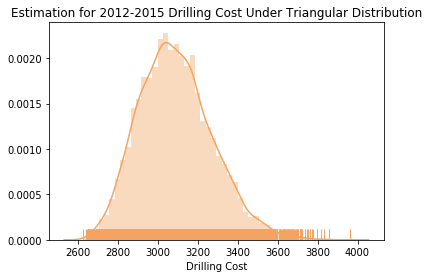

In [114]:
ax=sns.distplot(cost_2012_2015, color='sandybrown',rug=True)
  
# giving labels to x-axis and y-axis 
ax.set(xlabel ='Drilling Cost') 
  
# giving title to the plot 
plt.title('Estimation for 2012-2015 Drilling Cost Under Triangular Distribution'); 
  
# function to show plot 
plt.show()

In [97]:
#From 2015 to 2019 costs tended to increase on average by 5% per year with a maximum of 6% and minimum of 2%.
t_min2, t_mean2, t_max2=0.02, 0.05, 0.06
cost_t2=cost_2012_2015.mean()
def triangular(t_min2, t_mean2, t_max2):
    for i in range(10001):
        dx = np.random.triangular(t_min2, t_mean2, t_max2, size=10000) 
        Pt = cost_t2*(1 + dx)
        for j in range(2015, 2019):
            dx = np.random.triangular(t_min2, t_mean2, t_max2, size=10000) 
            Pt = Pt*(1 + dx)
        return Pt
cost_2015_2019=triangular(t_min2, t_mean2, t_max2)

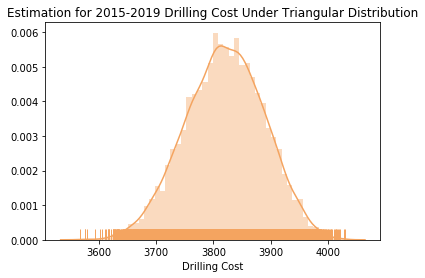

In [115]:

ax=sns.distplot(cost_2015_2019, color='sandybrown',rug=True)
  
# giving labels to x-axis and y-axis 
ax.set(xlabel ='Drilling Cost') 
  
# giving title to the plot 
plt.title('Estimation for 2015-2019 Drilling Cost Under Triangular Distribution'); 
  
# function to show plot 
plt.show()

In [99]:
#2020 is forecasted to follow the same increase distribution as from 2015 to 2019.
t_min3, t_mean3, t_max3=0.02, 0.05, 0.06
cost_t3=cost_2015_2019.mean()
def triangular(t_min3, t_mean3, t_max3):
    for i in range(10001):
        dx = np.random.triangular(t_min3, t_mean3, t_max3, size=10000) 
        Pt = cost_t3*(1 + dx)
    return Pt
cost_2020=triangular(t_min3, t_mean3, t_max3)

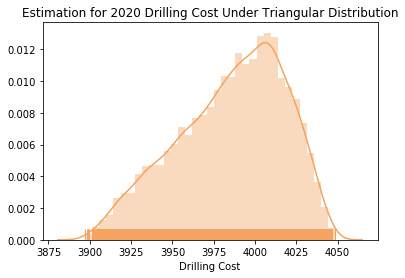

In [116]:

ax=sns.distplot(cost_2020, color='sandybrown',rug=True)
  
# giving labels to x-axis and y-axis 
ax.set(xlabel ='Drilling Cost') 
  
# giving title to the plot 
plt.title('Estimation for 2020 Drilling Cost Under Triangular Distribution'); 
  
# function to show plot 
plt.show()

In [101]:
cost_2020.mean(), cost_2020.std()

(3985.5577661155867, 32.345579146184974)

In [110]:
np.percentile(cost_2020,  [5,25,50,75,95], axis=0)

array([3925.88426293, 3962.87557297, 3990.15504776, 4010.67137972,
       4031.61367265])

In [106]:
help(np.percentile)

Help on function percentile in module numpy:

percentile(a, q, axis=None, out=None, overwrite_input=False, interpolation='linear', keepdims=False)
    Compute the q-th percentile of the data along the specified axis.
    
    Returns the q-th percentile(s) of the array elements.
    
    Parameters
    ----------
    a : array_like
        Input array or object that can be converted to an array.
    q : array_like of float
        Percentile or sequence of percentiles to compute, which must be between
        0 and 100 inclusive.
    axis : {int, tuple of int, None}, optional
        Axis or axes along which the percentiles are computed. The
        default is to compute the percentile(s) along a flattened
        version of the array.
    
        .. versionchanged:: 1.9.0
            A tuple of axes is supported
    out : ndarray, optional
        Alternative output array in which to place the result. It must
        have the same shape and buffer length as the expected output,
     